# Case Study: Gastrulation

## Import Packages

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import glob
import pandas as pd
import math
import matplotlib.pyplot as plt

# import from absolute directory
srcdir = '/Users/pengzhizhang/cellDancer/src'
srcdir = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/src'
srcdir = '/Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/src'
sys.path.append(srcdir)
from celldancer import velocity_estimation
from celldancer.compute_cell_velocity import compute_cell_velocity
from celldancer.pseudo_time import pseudo_time
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap

## Velocity Estimation for Sample Genes

In [2]:
%autoreload 2

raw_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/raw_data/mouse_endo_blood20to25_2000_genes_moment100.csv'
load_raw_data=pd.read_csv(raw_path)

max_epoches=200
check_n_epoch=10
learning_rate=0.001
downsample_method='neighbors'
step_i=200
step_j=200
sampling_ratio=0.125
n_neighbors=30
optimizer='Adam'
n_neighbors_downsample=30
auto_downsample=True
auto_norm_u_s=True
cost_type='smooth'
smooth_weight=0.1
patience=3
binning=True

# gene_list=load_raw_data.gene_name.drop_duplicates()
gene_list=['Hba-x','Smim1','Blvrb','Phc2',
           'Skap1','Nfkb1','Myo1b','Sulf2','Yipf5',
           'Coro2b','Mllt3','Smarca2','Hbb-y','Dlc1','Grb10','Rbms2']
folder_name=("epoch"+str(max_epoches)+"check_n"+str(check_n_epoch)+"Lr"+str(learning_rate)+"Down"+str(downsample_method)+"_"+str(step_i)+"_"+str(step_j)+"Ratio"+str(sampling_ratio)+"N"+str(n_neighbors)+"O"+str(optimizer)+"nD"+str(n_neighbors_downsample)+"autoD"+str(auto_downsample)+"autoN"+str(auto_norm_u_s)+"costT"+str(cost_type)+"smoW"+str(smooth_weight)+"p"+str(patience)+"bin"+str(binning))

# result_path = '/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/tunning_train/'+folder_name+'/'
# os.mkdir(result_path)
result_path = None

# Velocity Estimation
brief, load_cellDancer=velocity_estimation.train(load_raw_data,\
                                                 gene_choice=gene_list,\
                                                 max_epoches=max_epoches,\
                                                 check_n_epoch=check_n_epoch,\
                                                 learning_rate=learning_rate, \
                                                 downsample_method=downsample_method,\
                                                 step_i=step_i,\
                                                 step_j=step_j,\
                                                 sampling_ratio=sampling_ratio,\
                                                 n_neighbors=n_neighbors,\
                                                 optimizer=optimizer,\
                                                 n_neighbors_downsample=n_neighbors_downsample,\
                                                 auto_downsample=auto_downsample,\
                                                 auto_norm_u_s=auto_norm_u_s,\
                                                 cost_type=cost_type,\
                                                 smooth_weight=smooth_weight,\
                                                 patience=patience,\
                                                 binning=binning,\
                                                 result_path=result_path,n_jobs=1)

Using /Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/analysis/cell_dancer_velocity_2022-05-04 15-34-31 as the output path.
--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


Velocity Estimation:   0%|                                | 0/1 [00:00<?, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------
---------------------------------------------

Velocity Estimation: 100%|████████████████████████| 1/1 [01:11<00:00, 71.59s/it]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


## Sample Genes' Velocity Plot

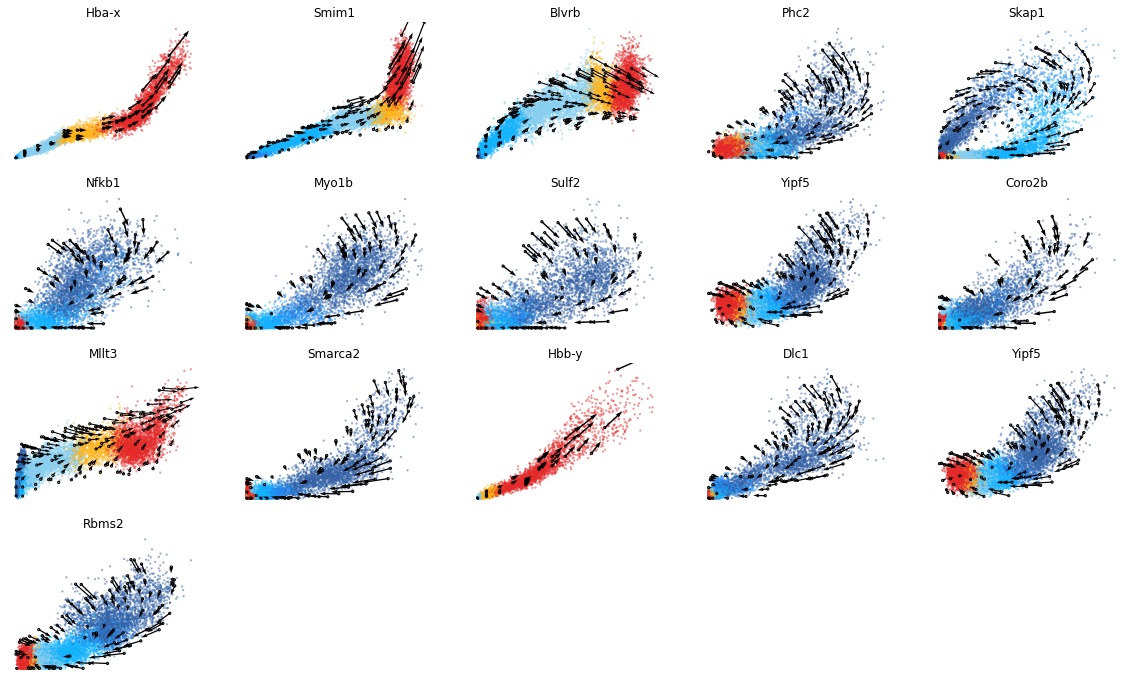

In [3]:
ncols=5
fig = plt.figure(figsize=(20,16))

gene_list=['Hba-x','Smim1','Blvrb','Phc2',
           'Skap1','Nfkb1','Myo1b','Sulf2','Yipf5',
           'Coro2b','Mllt3','Smarca2','Hbb-y','Dlc1','Yipf5','Rbms2']

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='spliced',
        y='unspliced',
        load_cellDancer=load_cellDancer,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_erythroid,
        alpha=0.5, 
        s = 5,
        velocity=True,
        gene_name=gene_list[i])
    
    ax.set_title(gene_list[i])
    ax.axis('off')

plt.show()

## Load velocity estimation result of 2000 genes

In [4]:
#detail_file = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000genes_with_bin_and_smooth/combined_detail/combined_detail.csv'
detail_file = '/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/tunning_train/epoch200check_n10Lr0.001Downneighbors_200_200Ratio0.125N30OAdamnD30autoDTrueautoNTruecostTsmoothsmoW0.1p3binTrue/cell_dancer_velocity_2022-05-03 18-49-21/celldancer_estimation.csv'

output_path = os.getcwd()
load_cellDancer=pd.read_csv(detail_file)
load_cellDancer

cellIndex gene_name        s0        u0        s1        u1  \
0                 0     Ift81  0.026321  0.010658  0.029678  0.009281   
1                 1     Ift81  0.044266  0.000000  0.037986  0.000994   
2                 2     Ift81  0.064559  0.000000  0.055336  0.000936   
3                 3     Ift81  0.020756  0.000000  0.017835  0.001063   
4                 4     Ift81  0.013184  0.000000  0.011334  0.001085   
...             ...       ...       ...       ...       ...       ...   
24657995      12324    Mcrip1  1.128435  0.000000  1.126852  0.000080   
24657996      12325    Mcrip1  0.970672  0.024356  1.468201  0.015411   
24657997      12326    Mcrip1  0.899107  0.000000  0.897765  0.000097   
24657998      12327    Mcrip1  1.398107  0.017375  1.764710  0.010764   
24657999      12328    Mcrip1  0.988933  0.005194  1.098821  0.003278   

             alpha      beta     gamma      loss       cellID  \
0         0.024614  0.043046  0.072913  0.039428     cell_363   
1         0.021712  0.043374  0.073363  0.039428     cell_382   
2         0.020447  0.043307  0.073875  0.039428     cell_385   
3         0.023218  0.043451  0.072763  0.039428     cell_393   
4         0.023697  0.043477  0.072567  0.039428     cell_398   
...            ...       ...       ...       ...          ...   
24657995  0.003006  0.043029  0.008092  0.052719  cell_139318   
24657996  0.009476  0.040149  0.009596  0.052719  cell_139321   
24657997  0.003658  0.042447  0.008614  0.052719  cell_139326   
24657998  0.006875  0.041571  0.008628  0.052719  cell_139327   
24657999  0.005155  0.042021  0.008827  0.052719  cell_139330   

                     clusters  embedding1  embedding2  
0         Blood progenitors 2    3.460521   15.574629  
1         Blood progenitors 2    2.490433   14.971734  
2         Blood progenitors 2    2.351203   15.267069  
3         Blood progenitors 2    5.899098   14.388825  
4         Blood progenitors 2    4.823139   15.374831  
...                       ...         ...         ...  
24657995           Erythroid3    8.032358    7.603037  
24657996           Erythroid3   10.352904    6.446736  
24657997           Erythroid3    9.464873    7.261099  
24657998           Erythroid3    9.990495    7.243880  
24657999           Erythroid3    8.260699    7.935455  

[24658000 rows x 14 columns]

## Compute Cell Velocity and Estimate Pseudotime

In [5]:
# Set Parameters
n_neighbors=10
downsample_step=(100,100)
mode='gene'
transfer_mode='power10'
min_mass=15
grid_steps=(20,20)
custom_xlim=[-6,13]
custom_ylim=[2,16]
alpha_inside=0.3

# Compute Cell Velocity
gene_choice=list(set(load_cellDancer.gene_name))
compute_cell_velocity(load_cellDancer=load_cellDancer,
              gene_list=gene_choice,
              mode=mode,
              transfer_mode=transfer_mode,
              n_neighbors=n_neighbors,
              step=downsample_step)

(genes, cells): (2000, 12329)
After downsampling, there are  951 cells.


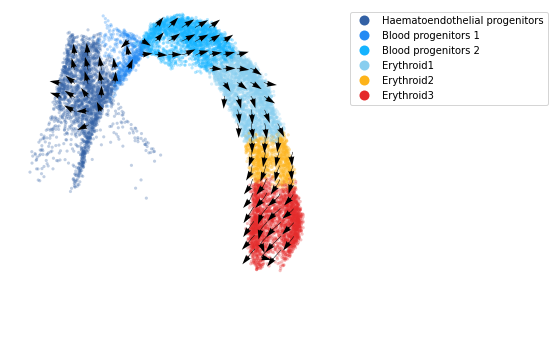

In [6]:
fig, ax = plt.subplots(figsize=(6,6))
im = cdplt.cell.scatter_cell(ax,load_cellDancer, colors=colormap.colormap_erythroid, alpha=alpha_inside, s=10,
             velocity=True, custom_xlim=custom_xlim, custom_ylim=custom_ylim, legend='on',min_mass=min_mass,grid_steps=grid_steps)
ax.axis('off')
plt.show()

## Estimate Pseudotime

In [7]:
%%capture
cell_time = dict()
dt = 0.01
t_total = {dt:int(10/dt)} 
n_repeats = 10
grid = (20,20)
pseudo_time(load_cellDancer, grid, dt, t_total[dt], n_repeats, downsample_step)

## Plot Pseudotime

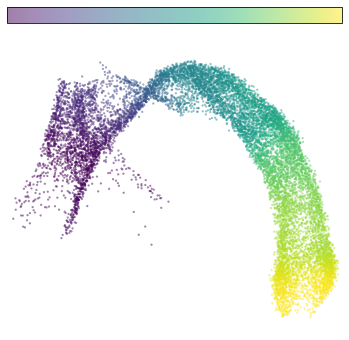

In [8]:
fig, ax = plt.subplots(figsize=(6,6))
clusters = load_cellDancer['clusters'].drop_duplicates().to_list()
im=cdplt.cell.scatter_cell(ax,load_cellDancer, colors='pseudotime', alpha=0.5, 
             velocity=False, custom_xlim=(-5,11), custom_ylim=(4,18))
ax.axis('off')
plt.show()

## Gene Pseudotime

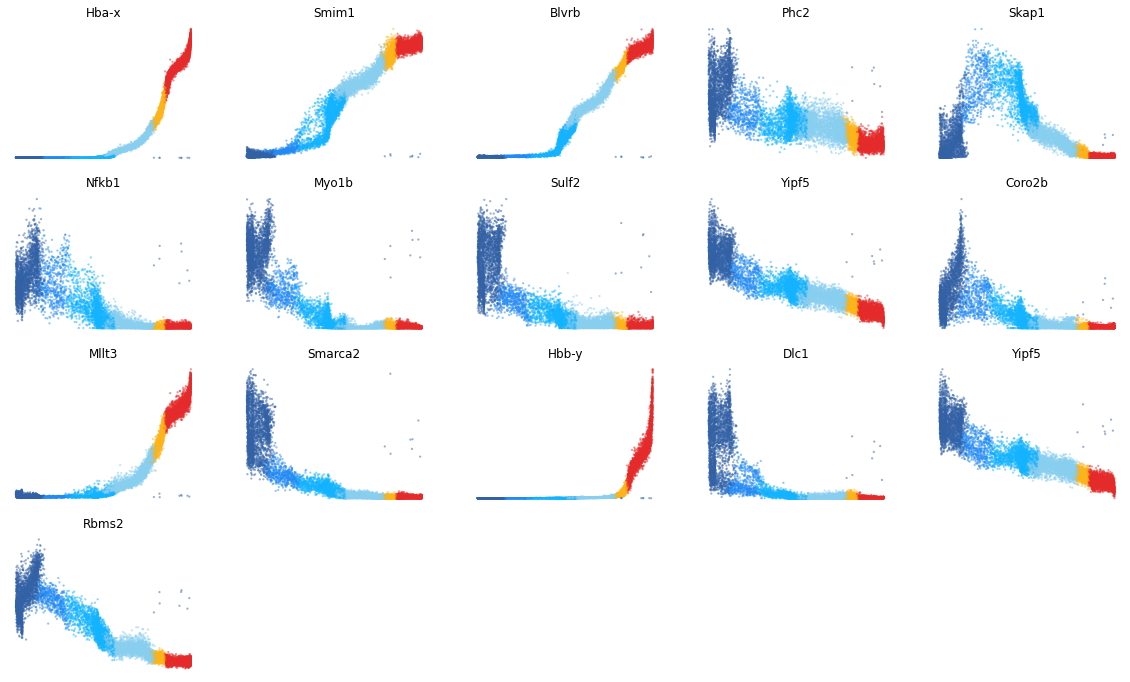

In [9]:
ncols=5
fig = plt.figure(figsize=(20,12))
for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='pseudotime',
        y='spliced',
        load_cellDancer=load_cellDancer,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_erythroid,
        alpha=0.5, 
        s = 5,
        velocity=False,
        gene_name=gene_list[i])

    ax.set_title(gene_list[i])
    ax.axis('off')

## Murk Genes Cell Velocity

In [10]:
murk_gene_pd=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/MURK_genes/13059_2021_2414_MOESM3_ESM.csv')
murk_gene_list=list(murk_gene_pd['index'])

In [11]:
# Set Parameters
n_neighbors=10
downsample_step=(100,100)
mode='gene'
transfer_mode='power10'
min_mass=15
grid_steps=(20,20)
custom_xlim=[-6,13]
custom_ylim=[2,16]
alpha_inside=0.3

# Compute Cell Velocity
compute_cell_velocity(load_cellDancer=load_cellDancer,
              gene_list=murk_gene_list,
              mode=mode,
              transfer_mode=transfer_mode,
              n_neighbors=n_neighbors,
              step=downsample_step)

(genes, cells): (2000, 12329)
Caution! Overwriting the 'velocity' columns.
After downsampling, there are  951 cells.


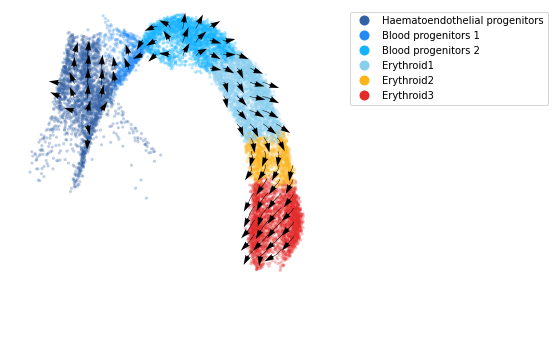

In [12]:
fig, ax = plt.subplots(figsize=(6,6))
im = cdplt.cell.scatter_cell(ax,load_cellDancer, colors=colormap.colormap_erythroid, alpha=alpha_inside, s=10,
             velocity=True, custom_xlim=custom_xlim, custom_ylim=custom_ylim, legend='on',min_mass=min_mass,grid_steps=grid_steps)
ax.axis('off')
plt.show()

## Gene Velocity by Cost Rank

In [13]:
loss_list=load_cellDancer[['gene_name','loss']].groupby(['gene_name']).mean()
loss_list_rank=loss_list.sort_values('loss')
loss_list_rank_low_20=list(loss_list_rank.index[0:20])
loss_list_rank_high_20=list(loss_list_rank.index[-20:])
loss_list_rank_low_300to320=list(loss_list_rank.index[300:320])
loss_list_rank_high_300to320=list(loss_list_rank.index[-320:-300])

In [14]:
loss_list_rank

loss
gene_name          
Gzmf       0.009423
Scai       0.011870
Gzmg       0.014455
Golga1     0.015978
Brip1      0.017405
...             ...
Ccnd1      0.649647
Id1        0.672909
Cdx2       0.673724
Hbb-bt     0.676404
Cks1b      0.681496

[2000 rows x 1 columns]

## low cost 20

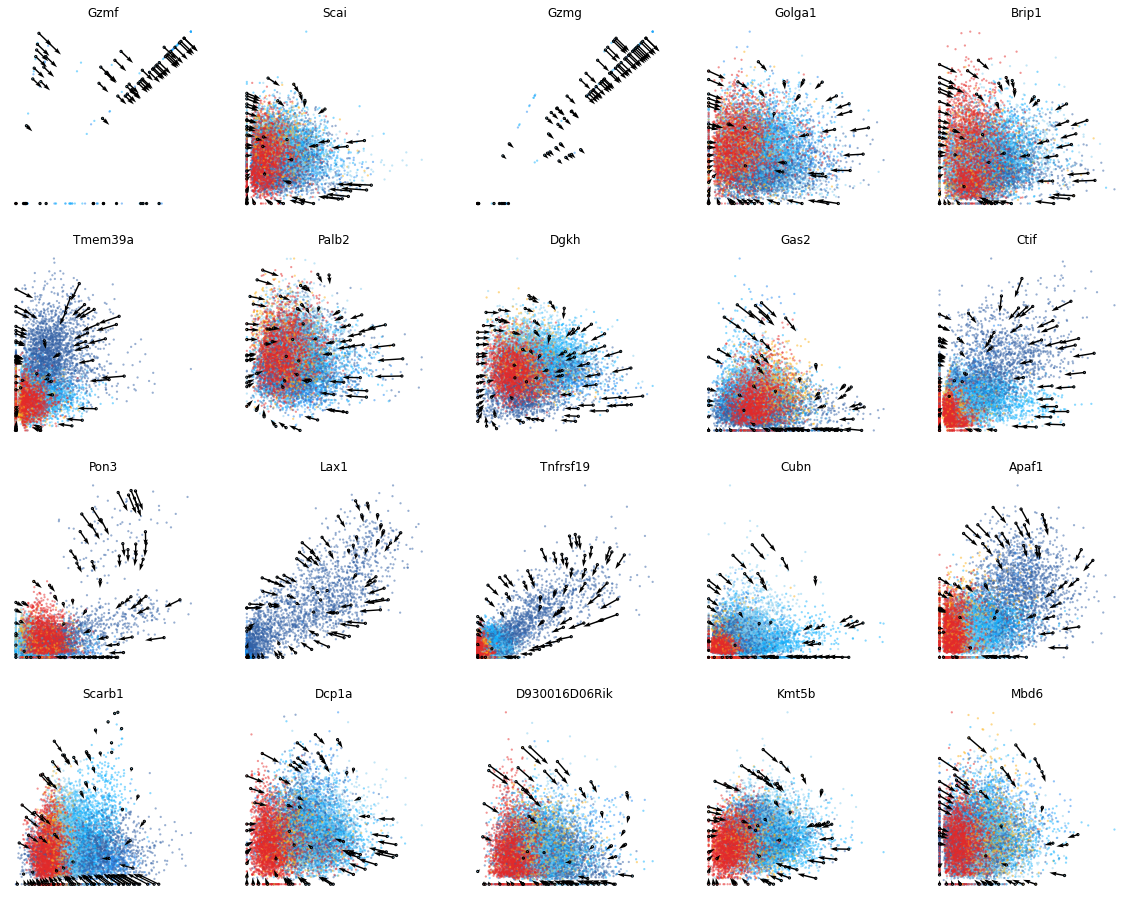

In [15]:
# Gene Velocity Plot - loss_list_rank_top_20 (low)

ncols=5
fig = plt.figure(figsize=(20,16))

for i in range(len(loss_list_rank_low_20)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='spliced',
        y='unspliced',
        load_cellDancer=load_cellDancer,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_erythroid,
        alpha=0.5, 
        s = 5,
        velocity=True,
        gene_name=loss_list_rank_low_20[i])
    
    ax.set_title(loss_list_rank_low_20[i])
    ax.axis('off')

plt.show()

## high cost 20

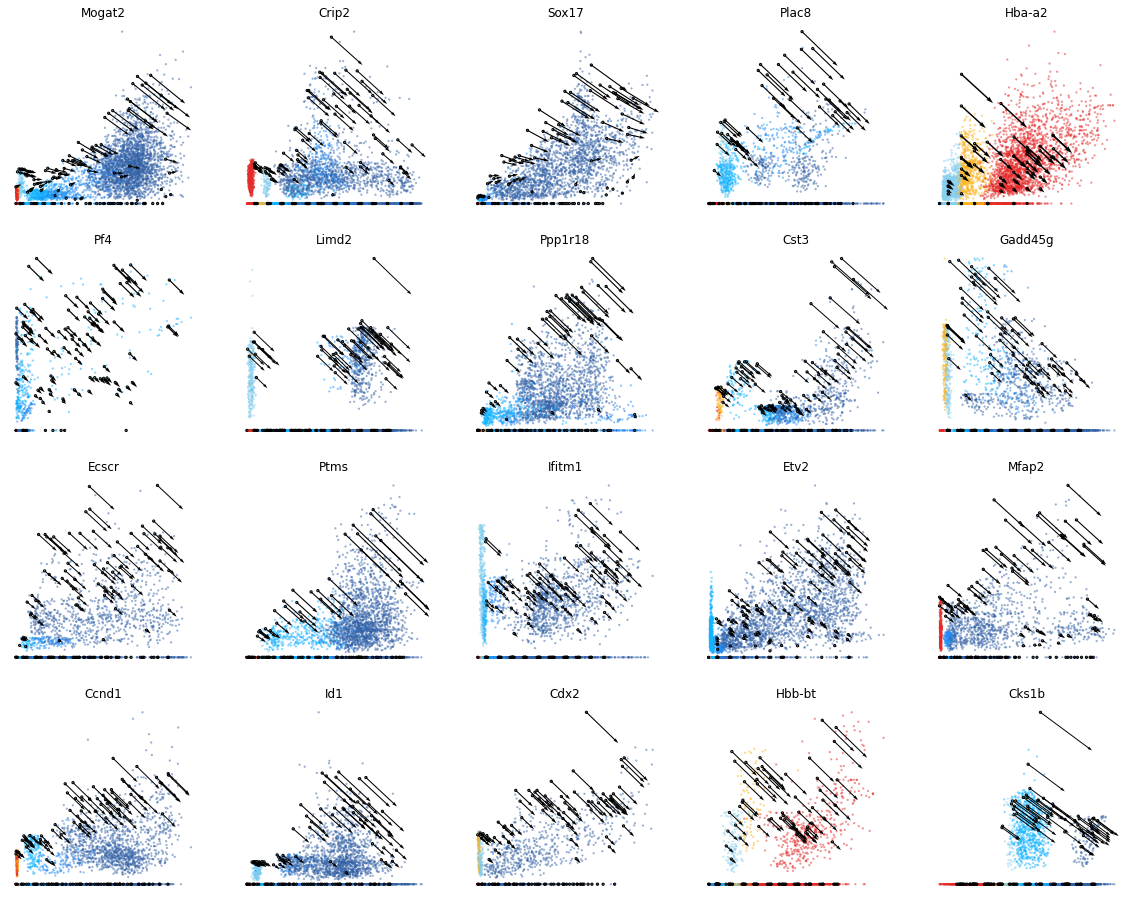

In [16]:
# Gene Velocity Plot - loss_list_rank_last_20 (high)

ncols=5
fig = plt.figure(figsize=(20,16))

for i in range(len(loss_list_rank_high_20)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='spliced',
        y='unspliced',
        load_cellDancer=load_cellDancer,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_erythroid,
        alpha=0.5, 
        s = 5,
        velocity=True,
        gene_name=loss_list_rank_high_20[i])
    
    ax.set_title(loss_list_rank_high_20[i])
    ax.axis('off')

plt.show()

## loss_list_rank_low_300to320

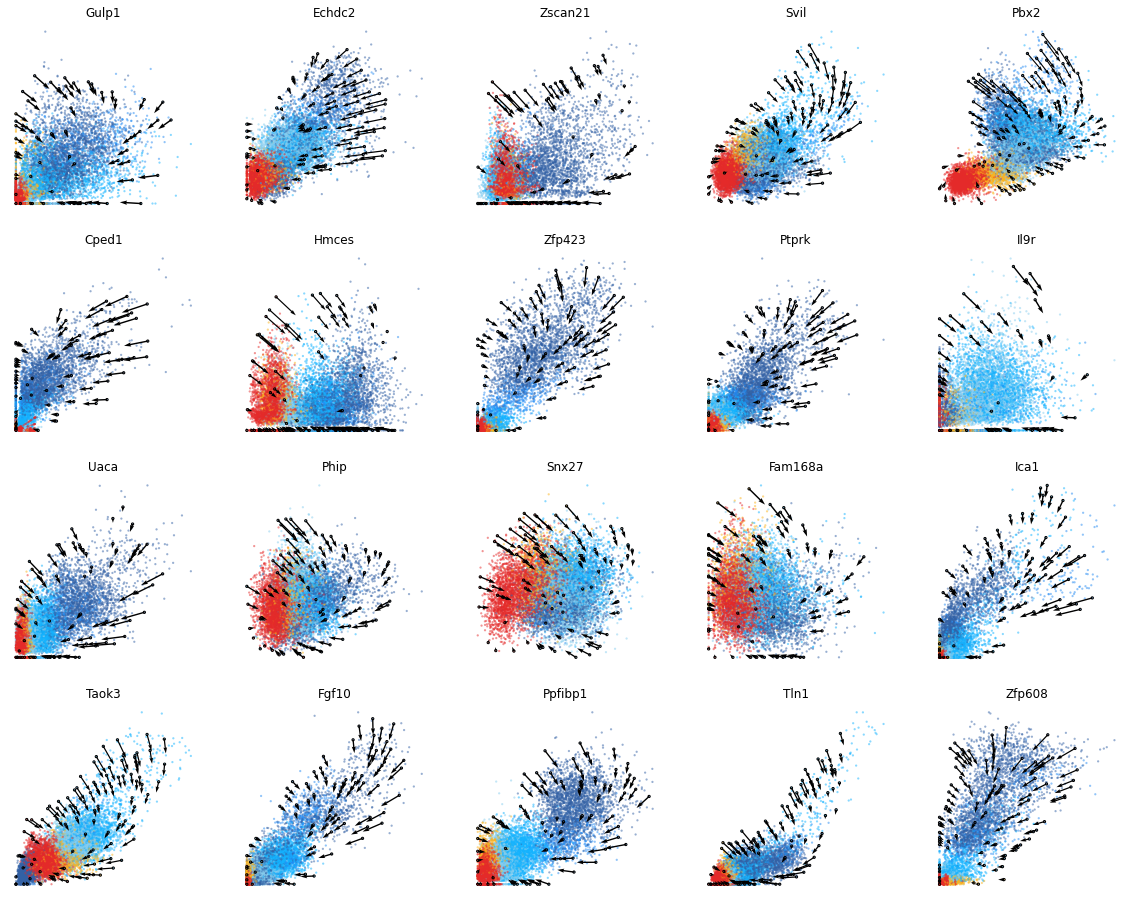

In [17]:
# Gene Velocity Plot - loss_list_rank_last_20 (high)

ncols=5
fig = plt.figure(figsize=(20,16))

for i in range(len(loss_list_rank_low_300to320)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='spliced',
        y='unspliced',
        load_cellDancer=load_cellDancer,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_erythroid,
        alpha=0.5, 
        s = 5,
        velocity=True,
        gene_name=loss_list_rank_low_300to320[i])
    
    ax.set_title(loss_list_rank_low_300to320[i])
    ax.axis('off')

plt.show()

## loss_list_rank_high_300to320

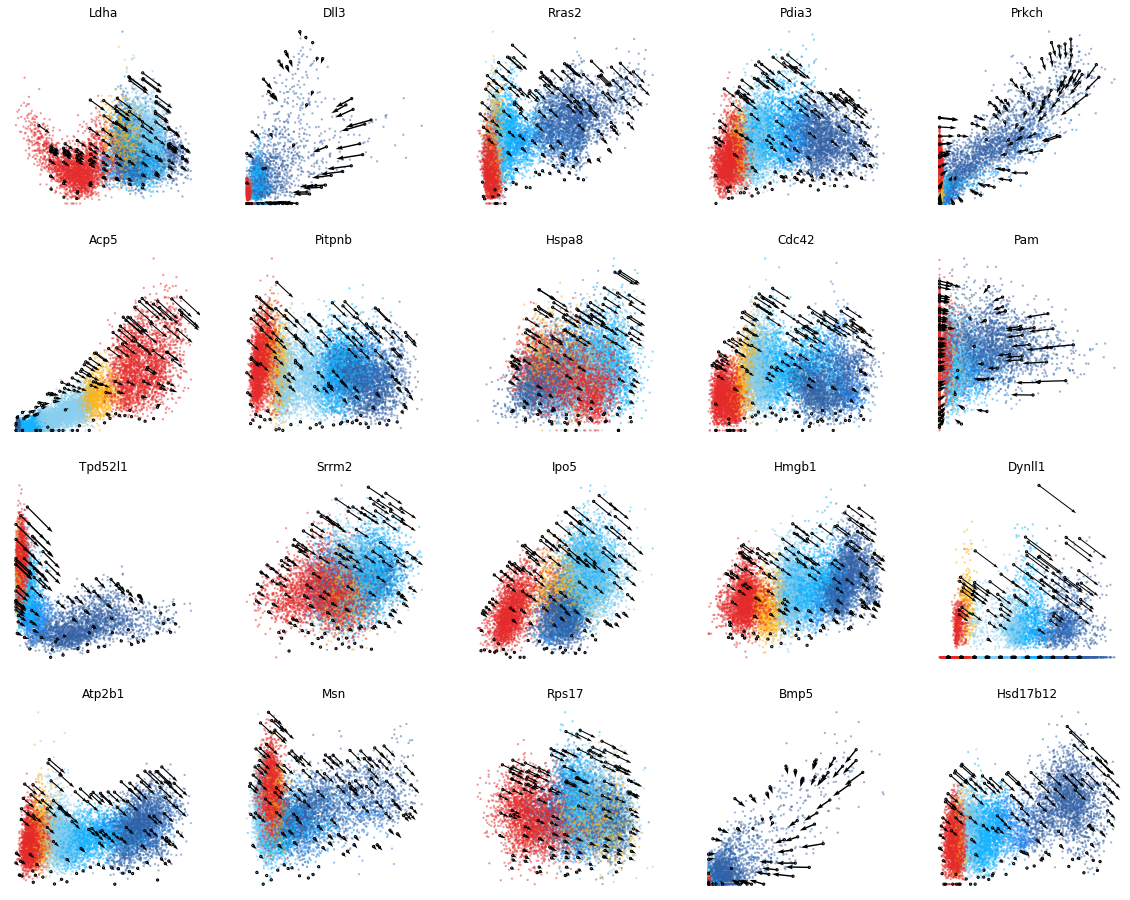

In [18]:
# Gene Velocity Plot - loss_list_rank_last_20 (high)

ncols=5
fig = plt.figure(figsize=(20,16))

for i in range(len(loss_list_rank_high_300to320)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='spliced',
        y='unspliced',
        load_cellDancer=load_cellDancer,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_erythroid,
        alpha=0.5, 
        s = 5,
        velocity=True,
        gene_name=loss_list_rank_high_300to320[i])
    
    ax.set_title(loss_list_rank_high_300to320[i])
    ax.axis('off')

plt.show()